In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# read in data 
newsFeed=pd.read_csv("/Users/srikarprayaga/Desktop/UNDP-NLP-Model-/Nigeria2019_Newsfeed.csv")
nf_meta=pd.read_csv("/Users/srikarprayaga/Desktop/UNDP-NLP-Model-/Nigeria2019_Newsfeed_Metadata.csv")
acled=pd.read_csv("/Users/srikarprayaga/Desktop/UNDP-NLP-Model-/Nigeria2019_ACLED_Extract.csv")

In [4]:
newsFeed.head()

,Newsfeed_PK,KPIFK,DateFK,Newsfeed_EventId,CountryFK,Newsfeed_Source,Newsfeed_Source_Description,Newsfeed_Source_Url,Newsfeed_DateDisplay,Newsfeed_CountryISO,...,Newsfeed_Description,Newsfeed_Description2,Newsfeed_Link,Newsfeed_Longitude,Newsfeed_Latitude,Newsfeed_Trajectory,Newsfeed_PeopleAffected,Newsfeed_Source2,Newsfeed_Language,Newsfeed_Entity
0,14127,109.0,20190111,18691,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,1/11/19 5:00,NGA,...,"ARMED CONFLICT On 09 January 2019, at about 22...","ARMED CONFLICT On 09 January 2019, at about 22...",NaN,NaN,NaN,NaN,NaN,NaN,English,NaN
1,14153,109.0,20190118,18720,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,1/18/19 5:00,NGA,...,"ARMED CONFLICTOn 16 January 2019, 1230hours, B...","ARMED CONFLICTOn 16 January 2019, 1230hours, B...",NaN,NaN,NaN,NaN,NaN,NaN,English,NaN
2,14206,109.0,20190125,18779,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,1/25/19 5:00,NGA,...,ARMED CONFLICTOn 25 January 2019 at about 0400...,ARMED CONFLICTOn 25 January 2019 at about 0400...,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN
3,14317,109.0,20190208,18909,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,2/8/19 5:00,NGA,...,ARMED CONFLICTOn 07 February 2019 at about 183...,ARMED CONFLICTOn 07 February 2019 at about 183...,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN
4,14428,109.0,20190215,19028,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,2/15/19 5:00,NGA,...,ARMED CONFLICTOn 12 February 2019 at about 180...,ARMED CONFLICTOn 12 February 2019 at about 180...,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN


In [5]:
nf_meta.head()

,Column Name,Column Description
0,Newsfeed_PK,Database Article ID
1,KPIFK,NaN
2,DateFK,Date ID (Year/Month/Day)
3,Newsfeed_EventId,Newsfeed Event ID
4,CountryFK,Country Unique ID


In [6]:
acled.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,6713388,566,NIG15966,15966,31-Dec-19,2019,1,Protests,Peaceful protest,Protesters (Nigeria),...,Katsina,12.9894,7.6006,1,Daily Trust (Nigeria),National,"On 31 December 2019, thousands of youth demons...",0,1578512391,NGA
1,7784010,566,NIG15968,15968,31-Dec-19,2019,1,Violence against civilians,Attack,Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati...,...,Michika,10.6159,13.3849,2,Sun (Nigeria),National,"On 31 December 2019, presumed Boko Haram (JAS)...",0,1617065408,NGA
2,6714193,566,NIG15963,15963,31-Dec-19,2019,1,Protests,Peaceful protest,Protesters (Nigeria),...,Ameke Ngwo,6.4390,7.4017,1,Vanguard (Nigeria),National,"On 31 December 2019, residents of Ameke Ngwo d...",0,1578512393,NGA
3,7784065,566,NIG15967,15967,31-Dec-19,2019,1,Violence against civilians,Attack,Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati...,...,Kopa,10.7447,13.3325,1,Sun (Nigeria),National,"On 31 December 2019, presumed Boko Haram (JAS)...",0,1617065408,NGA
4,7784086,566,NIG15964,15964,31-Dec-19,2019,1,Explosions/Remote violence,Air/drone strike,Military Forces of Nigeria (2015-),...,Gujeri,11.5333,12.8167,1,Sun (Nigeria),National,"On 31 December 2019, Nigerian Air Force conduc...",0,1617065408,NGA


## Cleaning Data 

In [7]:
# get null values per table
newsFeed.isnull().sum()

Newsfeed_PK                        0
KPIFK                          24442
DateFK                             0
Newsfeed_EventId                   0
CountryFK                          0
Newsfeed_Source                    0
Newsfeed_Source_Description        0
Newsfeed_Source_Url               71
Newsfeed_DateDisplay               0
Newsfeed_CountryISO                0
Newsfeed_Country                   0
Newsfeed_Country_UNDPRegion        0
Newsfeed_IncidentType             71
Newsfeed_IncidentLevel         24493
Newsfeed_IncidentTypeDesc      24493
Newsfeed_Description               0
Newsfeed_Description2              0
Newsfeed_Link                    101
Newsfeed_Longitude              2395
Newsfeed_Latitude               2395
Newsfeed_Trajectory            24472
Newsfeed_PeopleAffected        24493
Newsfeed_Source2                 559
Newsfeed_Language                  0
Newsfeed_Entity                 2402
dtype: int64

In [8]:
nf_meta.isnull().sum()

Column Name           0
Column Description    5
dtype: int64

In [9]:
acled.isnull().sum()

data_id                0
iso                    0
event_id_cnty          0
event_id_no_cnty       0
event_date             0
year                   0
time_precision         0
event_type             0
sub_event_type         0
actor1                 0
assoc_actor_1       1470
inter1                 0
actor2               602
assoc_actor_2       1686
inter2                 0
interaction            0
region                 0
country                0
admin1                 0
admin2                 0
admin3              2216
location               0
latitude               0
longitude              0
geo_precision          0
source                 0
source_scale           0
notes                  0
fatalities             0
timestamp              0
iso3                   0
dtype: int64

In [10]:
#print shape of data 
print(newsFeed.shape)
print(nf_meta.shape)
print(acled.shape)

(24493, 25)
(25, 2)
(2216, 31)


In [33]:
# drop all columns in newsFeed which have null values
newsFeed.dropna(axis=1,inplace=True)


In [34]:
newsFeed.shape

(24493, 13)

In [27]:
acled.dropna(axis=1,inplace=True)

In [29]:
acled.shape

(2216, 27)

In [35]:
# post dropping columsn with large number of null values
newsFeed.isnull().sum()

Newsfeed_PK                    0
DateFK                         0
Newsfeed_EventId               0
CountryFK                      0
Newsfeed_Source                0
Newsfeed_Source_Description    0
Newsfeed_DateDisplay           0
Newsfeed_CountryISO            0
Newsfeed_Country               0
Newsfeed_Country_UNDPRegion    0
Newsfeed_Description           0
Newsfeed_Description2          0
Newsfeed_Language              0
dtype: int64

In [32]:
acled.isnull().sum()

data_id             0
iso                 0
event_id_cnty       0
event_id_no_cnty    0
event_date          0
year                0
time_precision      0
event_type          0
sub_event_type      0
actor1              0
inter1              0
inter2              0
interaction         0
region              0
country             0
admin1              0
admin2              0
location            0
latitude            0
longitude           0
geo_precision       0
source              0
source_scale        0
notes               0
fatalities          0
timestamp           0
iso3                0
dtype: int64

## Data Exploration

In [42]:
newsFeed.columns

Index(['Newsfeed_PK', 'DateFK', 'Newsfeed_EventId', 'CountryFK',
       'Newsfeed_Source', 'Newsfeed_Source_Description',
       'Newsfeed_DateDisplay', 'Newsfeed_CountryISO', 'Newsfeed_Country',
       'Newsfeed_Country_UNDPRegion', 'Newsfeed_Description',
       'Newsfeed_Description2', 'Newsfeed_Language'],
      dtype='object')

In [38]:
nf_meta.head()

,Column Name,Column Description
0,Newsfeed_PK,Database Article ID
1,KPIFK,NaN
2,DateFK,Date ID (Year/Month/Day)
3,Newsfeed_EventId,Newsfeed Event ID
4,CountryFK,Country Unique ID


In [41]:
acled.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'inter1', 'inter2', 'interaction', 'region', 'country', 'admin1',
       'admin2', 'location', 'latitude', 'longitude', 'geo_precision',
       'source', 'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

<AxesSubplot:>

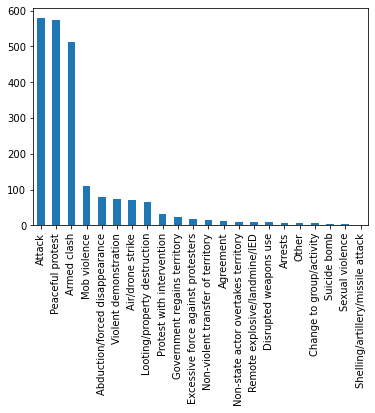

In [47]:
# plot  sub event type in aceled in the form of a bar chart 
acled['sub_event_type'].value_counts().plot(kind='bar')
